In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing dataset

In [66]:
df=pd.read_csv("churn_prediction_demo.1.csv")

In [67]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,50000.00,2,1,1,70000.00,0
1,1002,Female,45,2,60000.00,1,0,1,80000.00,1
2,1003,Female,23,1,30000.00,1,1,0,30000.00,0
3,1004,Female,42,2,0.00,1,1,1,101348.88,1
4,1005,Female,41,1,83807.86,1,0,1,112542.58,0


In [68]:
df.tail()


,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,10999,Male,39,5,0.00,2,1,0,96270.64,0
9999,11000,Male,35,10,57369.61,1,1,1,101699.77,0
10000,11001,Female,36,7,0.00,1,0,1,42085.58,1
10001,11002,Male,42,3,75075.31,2,1,0,92888.52,1
10002,11003,Female,28,4,130142.79,1,1,0,38190.78,0


checking for nan values in dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       10003 non-null  int64  
 1   Gender           10003 non-null  object 
 2   Age              10003 non-null  int64  
 3   Tenure           10003 non-null  int64  
 4   Balance          10003 non-null  float64
 5   NumOfProducts    10003 non-null  int64  
 6   HasCrCard        10003 non-null  int64  
 7   IsActiveMember   10003 non-null  int64  
 8   EstimatedSalary  10003 non-null  float64
 9   Exited           10003 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.6+ KB


In [70]:
df.isna().sum().sum()

0

therefore there are no nan values. 

checking for duplicates

In [71]:
df.duplicated().sum()

0

therefor no duplicate values

In [72]:
df.describe()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000
mean,6002.000000,38.920324,5.012096,76476.946204,1.530141,0.705488,0.515145,100078.216416,0.203739
std,2887.761705,10.487733,2.892176,62390.557447,0.581634,0.455846,0.499796,57507.274711,0.402797
min,1001.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3501.500000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.000000
50%,6002.000000,37.000000,5.000000,97157.960000,1.000000,1.000000,1.000000,100183.050000,0.000000
75%,8502.500000,44.000000,7.000000,127640.395000,2.000000,1.000000,1.000000,149382.875000,0.000000
max,11003.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


obtaining corerelation

In [73]:
numeric_colums_data=df.select_dtypes(include=["number"])
numeric_colums_data.corr()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerID,1.000000,0.001026,-0.006070,-0.008814,0.007418,0.000643,0.011880,-0.005623,-0.016727
Age,0.001026,1.000000,-0.009843,0.028421,-0.030625,-0.011936,0.085614,-0.007010,0.285434
Tenure,-0.006070,-0.009843,1.000000,-0.012121,0.013661,0.022647,-0.028312,0.007988,-0.014131
Balance,-0.008814,0.028421,-0.012121,1.000000,-0.304075,-0.014890,-0.010072,0.012918,0.118509
NumOfProducts,0.007418,-0.030625,0.013661,-0.304075,1.000000,0.003317,0.009693,0.014302,-0.047979
HasCrCard,0.000643,-0.011936,0.022647,-0.014890,0.003317,1.000000,-0.012016,-0.009989,-0.007506
IsActiveMember,0.011880,0.085614,-0.028312,-0.010072,0.009693,-0.012016,1.000000,-0.011378,-0.155876
EstimatedSalary,-0.005623,-0.007010,0.007988,0.012918,0.014302,-0.009989,-0.011378,1.000000,0.012112
Exited,-0.016727,0.285434,-0.014131,0.118509,-0.047979,-0.007506,-0.155876,0.012112,1.000000


In [74]:
df

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,50000.00,2,1,1,70000.00,0
1,1002,Female,45,2,60000.00,1,0,1,80000.00,1
2,1003,Female,23,1,30000.00,1,1,0,30000.00,0
3,1004,Female,42,2,0.00,1,1,1,101348.88,1
4,1005,Female,41,1,83807.86,1,0,1,112542.58,0
...,...,...,...,...,...,...,...,...,...,...
9998,10999,Male,39,5,0.00,2,1,0,96270.64,0
9999,11000,Male,35,10,57369.61,1,1,1,101699.77,0
10000,11001,Female,36,7,0.00,1,0,1,42085.58,1
10001,11002,Male,42,3,75075.31,2,1,0,92888.52,1


In [75]:
df["Exited"].value_counts()

Exited
0    7965
1    2038
Name: count, dtype: int64

upscaling

In [76]:
from sklearn.utils import resample
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,    
                                 n_samples=len(df_majority),    
                                 random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled.Exited.value_counts())

Exited
0    7965
1    7965
Name: count, dtype: int64


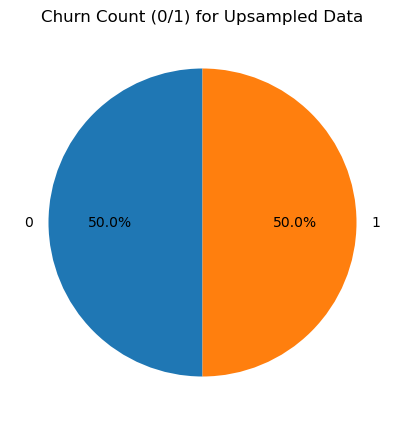

In [77]:
churn_counts_upsampled = df_upsampled['Exited'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(churn_counts_upsampled, labels=churn_counts_upsampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Count (0/1) for Upsampled Data')
plt.show()

In [78]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,50000.00,2,1,1,70000.00,0
1,1002,Female,45,2,60000.00,1,0,1,80000.00,1
2,1003,Female,23,1,30000.00,1,1,0,30000.00,0
3,1004,Female,42,2,0.00,1,1,1,101348.88,1
4,1005,Female,41,1,83807.86,1,0,1,112542.58,0


In [79]:
df_upsampled.groupby('Exited')['Balance'].mean()

Exited
0    72737.074482
1    91250.227375
Name: Balance, dtype: float64

In [80]:
df_upsampled.groupby(['Exited','Gender'])['Balance'].mean()

Exited  Gender
0       Female    71171.154705
        Male      73906.363263
1       Female    89289.627538
        Male      93734.881651
Name: Balance, dtype: float64

In [81]:
df_upsampled.groupby('Exited')['Tenure'].mean()

Exited
0    5.032768
1    4.894413
Name: Tenure, dtype: float64

In [82]:
df_upsampled.groupby('Exited')['Age'].mean()

Exited
0    37.406152
1    44.722034
Name: Age, dtype: float64

In [83]:
print(df_upsampled.groupby('Exited')['EstimatedSalary'].mean())

Exited
0     99725.902534
1    101207.277026
Name: EstimatedSalary, dtype: float64


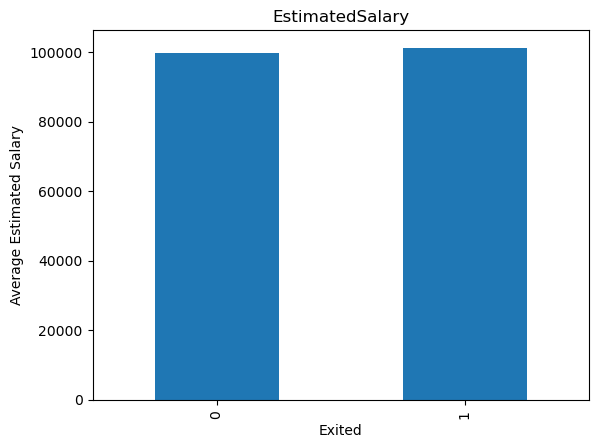

In [84]:
df_upsampled.groupby("Exited")["EstimatedSalary"].mean().plot(kind="bar")
plt.title("EstimatedSalary")
plt.xlabel("Exited")
plt.ylabel("Average Estimated Salary")
plt.show()

feature engineering

In [85]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [86]:
y=df[["Exited"]]
x=df[["CustomerID","Age","Gender","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].copy()

In [87]:
x

,CustomerID,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1001,34,Male,5,50000.00,2,1,1,70000.00
1,1002,45,Female,2,60000.00,1,0,1,80000.00
2,1003,23,Female,1,30000.00,1,1,0,30000.00
3,1004,42,Female,2,0.00,1,1,1,101348.88
4,1005,41,Female,1,83807.86,1,0,1,112542.58
...,...,...,...,...,...,...,...,...,...
9998,10999,39,Male,5,0.00,2,1,0,96270.64
9999,11000,35,Male,10,57369.61,1,1,1,101699.77
10000,11001,36,Female,7,0.00,1,0,1,42085.58
10001,11002,42,Male,3,75075.31,2,1,0,92888.52


In [88]:
y

,Exited
0,0
1,1
2,0
3,1
4,0
...,...
9998,0
9999,0
10000,1
10001,1


In [89]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,50000.00,2,1,1,70000.00,0
1,1002,Female,45,2,60000.00,1,0,1,80000.00,1
2,1003,Female,23,1,30000.00,1,1,0,30000.00,0
3,1004,Female,42,2,0.00,1,1,1,101348.88,1
4,1005,Female,41,1,83807.86,1,0,1,112542.58,0


In [90]:
x["Gender"]=x["Gender"].map({"Female": 1 ,"Male":0})

In [91]:
y

,Exited
0,0
1,1
2,0
3,1
4,0
...,...
9998,0
9999,0
10000,1
10001,1


In [92]:
x["Gender"].unique()

array([0, 1], dtype=int64)

In [93]:
x.head()

,CustomerID,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1001,34,0,5,50000.00,2,1,1,70000.00
1,1002,45,1,2,60000.00,1,0,1,80000.00
2,1003,23,1,1,30000.00,1,1,0,30000.00
3,1004,42,1,2,0.00,1,1,1,101348.88
4,1005,41,1,1,83807.86,1,0,1,112542.58


In [94]:
type(x["Gender"][0])


numpy.int64

In [95]:
type(y["Exited"][0])

numpy.int64

train test split

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [98]:
x_test = scaler.transform(x_test)


In [99]:
x_train

array([[ 0.73800661, -1.51331509,  1.10161456, ..., -1.55130783,
        -1.03407174,  0.44283544],
       [ 1.11487985,  0.00457625,  1.10161456, ...,  0.64461739,
        -1.03407174,  1.48873006],
       [ 0.2940951 , -0.09029196,  1.10161456, ..., -1.55130783,
         0.96705089, -0.73227363],
       ...,
       [ 1.5362137 , -1.13384226,  1.10161456, ...,  0.64461739,
         0.96705089, -0.29340208],
       [ 1.72725544,  0.09944446,  1.10161456, ..., -1.55130783,
        -1.03407174, -1.32982137],
       [-1.29363537,  0.28918087, -0.90775852, ...,  0.64461739,
         0.96705089, -1.4266185 ]])

In [100]:
x_test

array([[-0.06575806, -0.56463301,  1.10161456, ...,  0.64461739,
        -1.03407174,  1.25826037],
       [ 0.67826265, -0.56463301,  1.10161456, ..., -1.55130783,
         0.96705089,  0.92509196],
       [-0.56767679,  0.85839013,  1.10161456, ..., -1.55130783,
        -1.03407174,  0.47140277],
       ...,
       [-0.59372793, -0.75436942,  1.10161456, ..., -1.55130783,
         0.96705089,  0.52945246],
       [-1.13454971, -0.56463301, -0.90775852, ..., -1.55130783,
         0.96705089, -0.43803798],
       [-0.90495228, -0.65950121, -0.90775852, ...,  0.64461739,
        -1.03407174,  0.24081288]])

In [101]:
from sklearn.metrics import accuracy_score
def modelperformance(model_name, predictions):
  print("Accuracy score on {} is {}".format(model_name, accuracy_score(y_test,predictions)))

Importing grid search for hyper tunning

In [102]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Best estimator
best_lr_model = grid_search.best_estimator_

# Save the model
joblib.dump(best_lr_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model (NO comma!)
rfc_model = RandomForestClassifier()

# Define parameter grid (NO comma!)
param_grid = {
    "n_estimators": [64, 128],
    "max_features": [3, 4],
    "bootstrap": [True]
}

# Perform grid search
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(x_train, y_train.values.ravel())

# Get best estimator
best_rfc_model = grid_rfc.best_estimator_

# Save model
joblib.dump(best_rfc_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [120]:
import xgboost as xgb

# Define XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

# Grid Search
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train.values.ravel())

# Best estimator
best_xgb_model = grid_xgb.best_estimator_

# Save model
joblib.dump(best_xgb_model, "xgboost_model.pkl")


['xgboost_model.pkl']

model selection

In [121]:
from sklearn.metrics import accuracy_score


# Dictionary of models
models = {
    "Logistic Regression": best_lr_model,
    "Random Forest Classifier": best_rfc_model,
    "XGBoost Classifier": best_xgb_model
}

# Evaluate and select best model
best_model_name = None
best_model = None
best_accuracy = 0

for name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    if acc > best_accuracy:
        best_model_name = name
        best_model = model
        best_accuracy = acc

# Save the best model
joblib.dump(best_model, "model.pkl")


Logistic Regression: Accuracy = 0.8001
Random Forest Classifier: Accuracy = 0.8406
XGBoost Classifier: Accuracy = 0.8481


['model.pkl']

model evaluation and output

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1591
           1       0.76      0.38      0.50       410

    accuracy                           0.85      2001
   macro avg       0.81      0.67      0.71      2001
weighted avg       0.84      0.85      0.83      2001



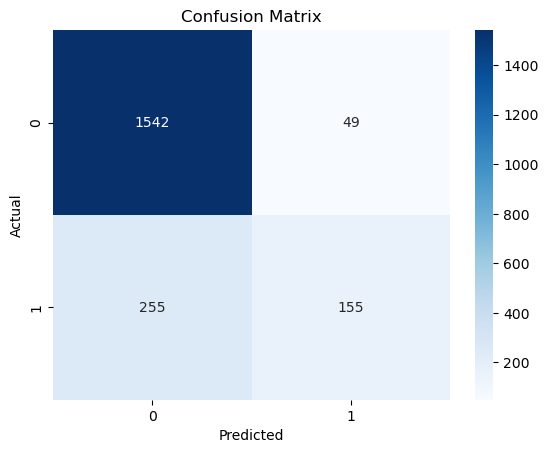

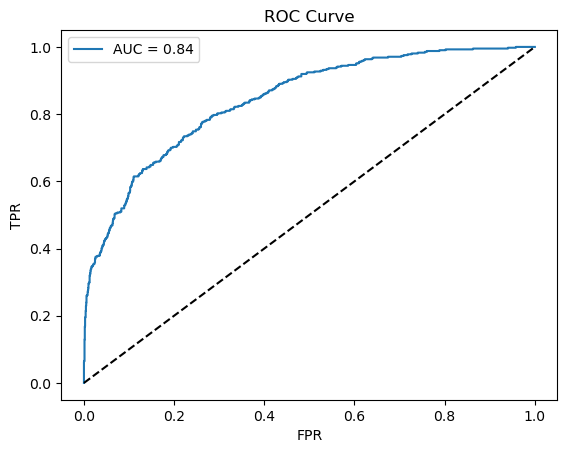

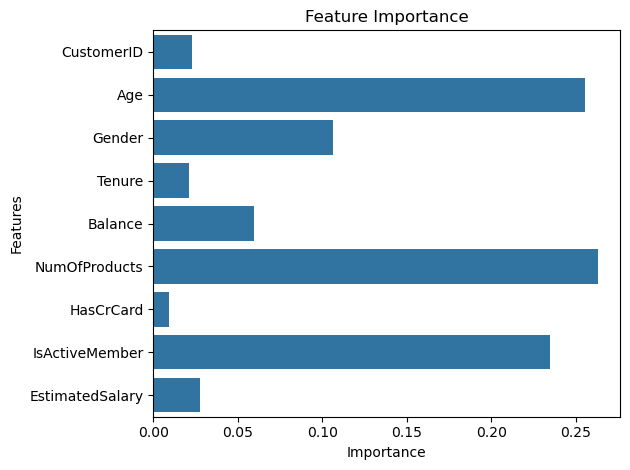

✅ Output saved to final_churn_predictions.csv


In [126]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predictions are 1D
y_pred = best_model.predict(x_test).ravel()
y_proba = best_model.predict_proba(x_test)[:, 1].ravel()

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC and AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance (tree models only)
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    features = x.columns
    sns.barplot(x=importance, y=features)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

# Ensure x_test is a DataFrame
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test, columns=x.columns)

# Add predictions to output DataFrame
output_df = x_test.copy()
output_df["Churn_Prediction"] = y_pred
output_df["Churn_Probability"] = y_proba

# Save to CSV
output_df.to_csv("final_churn_predictions.csv", index=False)
print("✅ Output saved to final_churn_predictions.csv")
